In [4]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
df = pd.read_csv('./dash_app/assets/societes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14335 entries, 0 to 14334
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entreprise_id        14335 non-null  int64  
 1   nom                  14335 non-null  object 
 2   description          13681 non-null  object 
 3   logo                 14326 non-null  object 
 4   Type d'organisme     6168 non-null   object 
 5   SIREN                11623 non-null  object 
 6   Activité principale  7727 non-null   object 
 7   Effectif_def         7929 non-null   object 
 8   market               6769 non-null   object 
 9   mots_cles_def        13219 non-null  object 
 10  site_web_def         7961 non-null   object 
 11  adresse_def          12386 non-null  object 
 12  date_creation_def    9038 non-null   object 
 13  SIRET                7726 non-null   float64
 14  Date de fermeture    1151 non-null   object 
 15  latitude             11920 non-null 

In [6]:
df.head()


,entreprise_id,nom,description,logo,Type d'organisme,SIREN,Activité principale,Effectif_def,market,mots_cles_def,site_web_def,adresse_def,date_creation_def,SIRET,Date de fermeture,latitude,longitude
0,1,#DOT:DOT,#dot:dot est un réseau mobile WiFi maillé oppo...,https://d3kqkuy1hpjocx.cloudfront.net/s3fs-pub...,PME,NaN,NaN,NaN,NaN,"infrastructures du numérique, ...",https://dotdot.fr/?utm_source=LesPepitesTech.com,"9 Avenue Paul Verlaine 38100 GRENOBLE, 9 Avenu...",NaN,NaN,NaN,NaN,NaN
1,2,+SIMPLE,"An insurance Robo-Broker for freelancers, smal...",https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,50 à 99 salariés,B2B,"commission, fintech, insurance, marketplace & ...",NaN,"Paris, France",2015-01-01,NaN,NaN,48.858890,2.320041
2,3,03 JULY,"Nice and useful, what else? We at 03 July, we ...",https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,20 à 49 salariés,B2B,"b2c, hosting, semiconductors",NaN,"Paris, France",2012-01-01,NaN,NaN,48.858890,2.320041
3,4,10 VINS,The first wine-by-the-glass connected sommelie...,https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,1 ou 2 salariés,B2B,"b2c, food, home living, in-store retail & rest...",NaN,"Nantes, France",NaN,NaN,NaN,47.218637,-1.554136
4,5,1001 SALLES,Allowing to respond quickly and efficiently to...,https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,20 à 49 salariés,NaN,"marketplace & ecommerce, subscription, travel",NaN,"Ivry-sur-Seine, France",2000-01-01,NaN,NaN,48.812230,2.387253


In [7]:
# Dictionnaire des secteurs d'activité (codes NAF partiels)
dict_secteurs = {
    '01': 'Agriculture',
    '02': 'Sylviculture et exploitation forestière',
    '03': 'Pêche et aquaculture',
    '05': 'Extraction de houille et de lignite',
    '08': 'Autres industries extractives',
    '10': 'Industries alimentaires',
    '13': 'Fabrication de textiles',
    '18': 'Imprimerie et reproduction d\'enregistrements',
    '26': 'Fabrication de produits informatiques et électroniques',
    '32': 'Autres industries manufacturières',
    '41': 'Construction de bâtiments',
    '43': 'Travaux de construction spécialisés',
    '49': 'Transports terrestres et transport par conduites',
    '56': 'Restauration',
    '58': 'Édition',
    '61': 'Télécommunications',
    '62': 'Programmation, conseil et autres activités informatiques',
    '63': 'Services d’information',
    '64': 'Activités financières et d’assurance',
    '68': 'Activités immobilières',
    '70': 'Activités des sièges sociaux, conseil en gestion',
    '71': 'Ingénierie et études techniques',
    '72': 'Recherche et développement scientifique',
    '73': 'Publicité et études de marché',
    '74': 'Autres activités spécialisées, scientifiques et techniques',
    '77': 'Location et exploitation de biens immobiliers',
    '82': 'Activités administratives et autres services de soutien'
}

# Étape 1 : Extraire les 2 premiers chiffres du code de l'activité principale
df['Secteur'] = df['Activité principale'].str[:2]

# Étape 2 : Mapper avec le dictionnaire des secteurs
df['Nom Secteur'] = df['Secteur'].map(dict_secteurs)

# Étape 3 : Calculer la distribution des secteurs les plus fréquents
secteur_counts = df['Nom Secteur'].value_counts().head(10)

# Afficher les résultats
secteur_counts

Programmation, conseil et autres activités informatiques      1865
Édition                                                        705
Activités des sièges sociaux, conseil en gestion               507
Ingénierie et études techniques                                463
Activités immobilières                                         450
Recherche et développement scientifique                        417
Services d’information                                         390
Autres activités spécialisées, scientifiques et techniques     258
Activités financières et d’assurance                           170
Fabrication de produits informatiques et électroniques         141
Name: Nom Secteur, dtype: int64

In [8]:
df['Nom Secteur'].value_counts()

Programmation, conseil et autres activités informatiques      1865
Édition                                                        705
Activités des sièges sociaux, conseil en gestion               507
Ingénierie et études techniques                                463
Activités immobilières                                         450
Recherche et développement scientifique                        417
Services d’information                                         390
Autres activités spécialisées, scientifiques et techniques     258
Activités financières et d’assurance                           170
Fabrication de produits informatiques et électroniques         141
Restauration                                                   106
Activités administratives et autres services de soutien        104
Publicité et études de marché                                   98
Travaux de construction spécialisés                             77
Location et exploitation de biens immobiliers                 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14335 entries, 0 to 14334
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entreprise_id        14335 non-null  int64  
 1   nom                  14335 non-null  object 
 2   description          13681 non-null  object 
 3   logo                 14326 non-null  object 
 4   Type d'organisme     6168 non-null   object 
 5   SIREN                11623 non-null  object 
 6   Activité principale  7727 non-null   object 
 7   Effectif_def         7929 non-null   object 
 8   market               6769 non-null   object 
 9   mots_cles_def        13219 non-null  object 
 10  site_web_def         7961 non-null   object 
 11  adresse_def          12386 non-null  object 
 12  date_creation_def    9038 non-null   object 
 13  SIRET                7726 non-null   float64
 14  Date de fermeture    1151 non-null   object 
 15  latitude             11920 non-null 

In [10]:
df.head(20)

,entreprise_id,nom,description,logo,Type d'organisme,SIREN,Activité principale,Effectif_def,market,mots_cles_def,site_web_def,adresse_def,date_creation_def,SIRET,Date de fermeture,latitude,longitude,Secteur,Nom Secteur
0,1,#DOT:DOT,#dot:dot est un réseau mobile WiFi maillé oppo...,https://d3kqkuy1hpjocx.cloudfront.net/s3fs-pub...,PME,NaN,NaN,NaN,NaN,"infrastructures du numérique, ...",https://dotdot.fr/?utm_source=LesPepitesTech.com,"9 Avenue Paul Verlaine 38100 GRENOBLE, 9 Avenu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,+SIMPLE,"An insurance Robo-Broker for freelancers, smal...",https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,50 à 99 salariés,B2B,"commission, fintech, insurance, marketplace & ...",NaN,"Paris, France",2015-01-01,NaN,NaN,48.858890,2.320041,NaN,NaN
2,3,03 JULY,"Nice and useful, what else? We at 03 July, we ...",https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,20 à 49 salariés,B2B,"b2c, hosting, semiconductors",NaN,"Paris, France",2012-01-01,NaN,NaN,48.858890,2.320041,NaN,NaN
3,4,10 VINS,The first wine-by-the-glass connected sommelie...,https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,1 ou 2 salariés,B2B,"b2c, food, home living, in-store retail & rest...",NaN,"Nantes, France",NaN,NaN,NaN,47.218637,-1.554136,NaN,NaN
4,5,1001 SALLES,Allowing to respond quickly and efficiently to...,https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,20 à 49 salariés,NaN,"marketplace & ecommerce, subscription, travel",NaN,"Ivry-sur-Seine, France",2000-01-01,NaN,NaN,48.812230,2.387253,NaN,NaN
5,6,1001-ARCHITECTURES,1001 Façons de sublimer votre espace de vie,https://d3kqkuy1hpjocx.cloudfront.net/s3fs-pub...,PME,841823347,59.11A,NaN,NaN,habitat,https://1001-architectures.fr/?utm_source=LesP...,2b Rue des Marronniers 67760 Gambsheim,2018-08-01,8.418233e+13,NaN,48.695616,7.890065,59,NaN
6,7,1001MAQUETTES,"Online retailer of plastic models of planes, t...",https://storage.googleapis.com/dealroom-images...,NaN,Non disponible,NaN,3 à 5 salariés,NaN,home living,NaN,"Paris, France",2011-01-01,NaN,NaN,48.858890,2.320041,NaN,NaN
7,8,1001PHARMACIES,Achetez sur internet chez les pharmacies franç...,https://storage.googleapis.com/dealroom-images...,PME,812052017,64.20Z,3 à 5 salariés,B2C,", marketplace, telecommunications, santé, e-co...",https://www.1001pharmacies.com/,128 Rue la Boétie 75008 Paris,2015-06-09,8.120520e+13,NaN,48.870955,2.305982,64,Activités financières et d’assurance
8,9,100M,100M simplifie la production du reporting trad...,https://upload.prd.hbd.cloud.bpifrance.fr/star...,NaN,823095401,58.29A,NaN,NaN,", bretagne, b2b",NaN,NaN,2016-09-30,8.230954e+13,2019-08-31,NaN,NaN,58,Édition
9,10,1083,Manufacture jeans and shoes in France,https://storage.googleapis.com/dealroom-images...,PME,804409134,47.71Z,50 à 99 salariés,B2C,"fashion, manufacturing, selling own inventory",NaN,49 Avenue Gambetta 26100 Romans-sur-Isère,2014-08-27,8.044091e+13,NaN,45.045131,5.060219,47,NaN


In [11]:
df['Effectif_def'].value_counts()


20 à 49 salariés         3201
3 à 5 salariés           2147
50 à 99 salariés         1297
1 ou 2 salariés           685
200 à 499 salariés        236
0 salarié                 107
500 à 999 salariés         92
1000 à 1999 salariés       87
5000 salariés ou plus      48
Effectif inconnu           29
Name: Effectif_def, dtype: int64

In [12]:
# Calculer la distribution des valeurs et trier par ordre décroissant
distribution = df['Nom Secteur'].value_counts().reset_index()
distribution.columns = ['Nom Secteur', 'Count']

# Filtrer pour afficher uniquement le TOP 5
distribution_top5 = distribution.sort_values(by='Count', ascending=True).tail(5)

# Créer le graphique en barres
fig = px.bar(distribution_top5, x='Count', y='Nom Secteur',
             title="Distribution des Secteurs d'Activité (TOP 5)",
             labels={'Nom Secteur': 'Secteur', 'Count': 'Nombre'},
             text='Count')

# Afficher le graphique
fig.show()

In [13]:
# Calculer la distribution des valeurs et trier par ordre décroissant
distribution = df['Nom Secteur'].value_counts().reset_index()
distribution.columns = ['Nom Secteur', 'Count']

# Filtrer pour afficher uniquement le TOP 5
distribution_top5 = distribution.sort_values(by='Count', ascending=True).head(5)

# Créer le graphique en barres
fig = px.bar(distribution_top5, x='Count', y='Nom Secteur',
             title="TOP 5 Bottom",
             labels={'Nom Secteur': 'Secteur', 'Count': 'Nombre'},
             text='Count')

# Afficher le graphique
fig.show()

In [14]:
#df['Effectif_def'].value_counts()

# Calculer la distribution des valeurs et trier par ordre décroissant
distribution = df['Effectif_def'].value_counts().reset_index()
distribution.columns = ['Nom Secteur', 'Count']

# Filtrer pour afficher uniquement le TOP 5
distribution_top5 = distribution.sort_values(by='Count', ascending=True).tail(5)

# Créer le graphique en barres
fig = px.bar(distribution_top5, x='Count', y='Nom Secteur',
             title="Distribution des StartUp par nombre de salariés (TOP 5)",
             labels={'Nom Secteur': 'Effectif', 'Count': 'Nombre'},
             text='Count')

# Afficher le graphique
fig.show()

In [15]:
# Calculer la distribution des valeurs et trier par ordre décroissant
distribution = df['Effectif_def'].value_counts().reset_index()
distribution.columns = ['Effectif', 'Count']

# Filtrer pour afficher uniquement le TOP 5
distribution_top5 = distribution.sort_values(by='Count', ascending=True).tail(5)

# Créer le graphique en camembert
fig = px.pie(distribution_top5, names='Effectif', values='Count',
             title="Répartition des StartUp par nombre de salariés (TOP 5)")

# Afficher le graphique
fig.show()

In [16]:
# Étape 1 : Remplacer les valeurs NaN par une chaîne vide
df['mots_cles_def'] = df['mots_cles_def'].fillna('')

# Étape 2 : Fusionner les mots-clés de toutes les lignes en une seule grande chaîne
all_keywords = ','.join(df['mots_cles_def'].astype(str))

# Étape 3 : Diviser les mots-clés en une liste de mots individuels
keywords_list = [keyword.strip() for keyword in all_keywords.split(',') if keyword.strip()]

# Étape 4 : Utiliser Counter pour compter la fréquence des mots-clés
keywords_freq = Counter(keywords_list)

# Étape 5 : Convertir le résultat en DataFrame trié
keywords_df = pd.DataFrame(keywords_freq.items(), columns=['Mot', 'Count']).sort_values(by='Count', ascending=False)

# Afficher les mots-clés les plus fréquents
keywords_df

,Mot,Count
44,saas,3033
6,commission,2381
19,subscription,2204
17,manufacturing,1824
86,artificial intelligence,1784
...,...,...
1977,topologie,1
1978,smartstores,1
1979,japon,1
349,labège,1


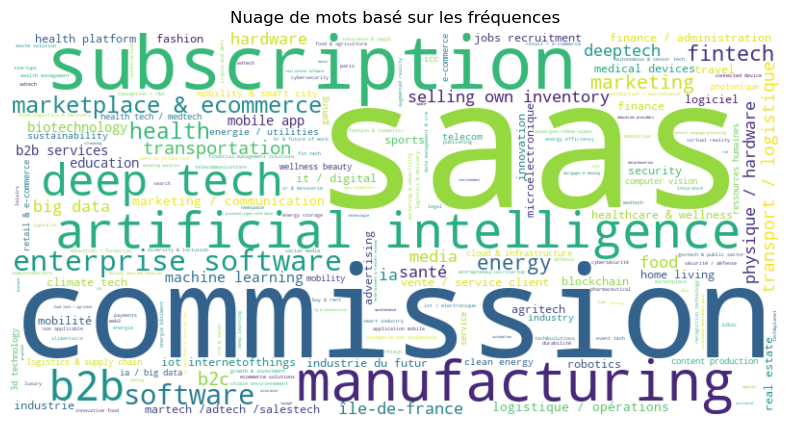

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


keywords_df

# Étape 1 : Créer un dictionnaire des mots avec leurs fréquences
word_freq = dict(zip(keywords_df['Mot'], keywords_df['Count']))

# Étape 2 : Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Étape 3 : Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Enlever les axes
plt.title("Nuage de mots basé sur les fréquences")
plt.show()

In [18]:
df['Nom Secteur'].value_counts()

Programmation, conseil et autres activités informatiques      1865
Édition                                                        705
Activités des sièges sociaux, conseil en gestion               507
Ingénierie et études techniques                                463
Activités immobilières                                         450
Recherche et développement scientifique                        417
Services d’information                                         390
Autres activités spécialisées, scientifiques et techniques     258
Activités financières et d’assurance                           170
Fabrication de produits informatiques et électroniques         141
Restauration                                                   106
Activités administratives et autres services de soutien        104
Publicité et études de marché                                   98
Travaux de construction spécialisés                             77
Location et exploitation de biens immobiliers                 